In [1]:
# Load the packages
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Customer Segmentation

In [2]:
df = pd.read_csv('C:/Users/DELL/Desktop/[RBAC 2023] Round 2 Dataset.csv')

In [3]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

last_date = df['TransactionDate'].max()

last_month = last_date.to_period('M')

df_filtered = df[df['TransactionDate'].dt.to_period('M') != last_month]

df = df_filtered

C:\Users\DELL\AppData\Local\Temp\ipykernel_9776\2015237899.py:5: UserWarning: Converting to Period representation will drop timezone information.
  last_month = last_date.to_period('M')
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [4]:
df

,Unnamed: 0,BillID,Channel,OrderFrom,TransactionDate,SalesAmount,CustomerID,CustomerGender,VoucherStatus,Province
0,0,0,Take Away,CALL CENTER,2021-10-01 00:00:00+00:00,296891.0,1753863,Unknown,No,Ho Chi Minh City
1,1,1,Take Away,STORE,2021-10-01 00:00:00+00:00,301782.0,1124050,Unknown,No,Hanoi
2,2,2,Take Away,WEBSITE,2021-10-01 00:00:00+00:00,319792.0,1626827,Male,No,Hanoi
3,3,3,Take Away,STORE,2021-10-01 00:00:00+00:00,424762.0,125643,Male,No,Hanoi
4,4,4,Delivery,STORE,2021-10-01 00:00:00+00:00,280031.0,2117237,Unknown,No,Hanoi
...,...,...,...,...,...,...,...,...,...,...
1397197,1397197,1397197,Delivery,WEBSITE,2023-06-30 00:00:00+00:00,307336.0,1526475,Female,Yes,Hanoi
1397198,1397198,1397198,Take Away,STORE,2023-06-30 00:00:00+00:00,210907.0,48613,Female,No,Hanoi
1397199,1397199,1397199,Take Away,STORE,2023-06-30 00:00:00+00:00,237248.0,711050,Unknown,No,Hanoi
1397200,1397200,1397200,Delivery,CALL CENTER,2023-06-30 00:00:00+00:00,119985.0,2046935,Female,No,Ho Chi Minh City


In [5]:
# Calculate the Recency of the Customer
from datetime import datetime

df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

df['TransactionDate'] = df['TransactionDate'].dt.tz_localize(None)

# print(df['TransactionDate'])

recent_purchase = df.groupby('CustomerID')['TransactionDate'].max()

now = datetime.now().replace(tzinfo=None)
recency = now - recent_purchase
recency = recency.dt.days

recency_df = pd.DataFrame({'CustomerID': recent_purchase.index, 'Recency': recency, 'Month': recent_purchase.dt.strftime('%Y-%m')})

print(recency_df)

            CustomerID  Recency    Month
CustomerID                              
0                    0      690  2021-12
1                    1      617  2022-03
8                    8      251  2023-03
14                  14      171  2023-05
16                  16      424  2022-09
...                ...      ...      ...
2174066        2174066      315  2023-01
2174072        2174072      345  2022-12
2174073        2174073      275  2023-02
2174075        2174075      339  2022-12
2174083        2174083      759  2021-10

[718050 rows x 3 columns]


In [6]:
# Calculate the Frequency of the customers
frequency = df.groupby('CustomerID')['TransactionDate'].count()

frequency_df = pd.DataFrame({'CustomerID': frequency.index, 'Frequency': frequency})

print(frequency_df)

            CustomerID  Frequency
CustomerID                       
0                    0          1
1                    1          1
8                    8          2
14                  14          1
16                  16          1
...                ...        ...
2174066        2174066          1
2174072        2174072          3
2174073        2174073          1
2174075        2174075          1
2174083        2174083          1

[718050 rows x 2 columns]


In [7]:
# Monetary of the customer
total_spent_per_customer = df.groupby('CustomerID')['SalesAmount'].sum()

print(total_spent_per_customer)

CustomerID
0           411663.0
1           105503.0
8          1941696.0
14          267607.0
16          286558.0
             ...    
2174066     143685.0
2174072     953618.0
2174073     514503.0
2174075     262489.0
2174083     185271.0
Name: SalesAmount, Length: 718050, dtype: float64


In [8]:
# RFM Table"
RMF_Table = pd.DataFrame({'Recency': recency, 'Frequency': frequency, 'Monetary': total_spent_per_customer})

print(RMF_Table)

            Recency  Frequency   Monetary
CustomerID                               
0               690          1   411663.0
1               617          1   105503.0
8               251          2  1941696.0
14              171          1   267607.0
16              424          1   286558.0
...             ...        ...        ...
2174066         315          1   143685.0
2174072         345          3   953618.0
2174073         275          1   514503.0
2174075         339          1   262489.0
2174083         759          1   185271.0

[718050 rows x 3 columns]


In [9]:
quantiles = RMF_Table.quantile(q=[0.2,0.4,0.6,0.8])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.2: 237.0, 0.4: 367.0, 0.6: 508.0, 0.8: 639.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 2.0},
 'Monetary': {0.2: 177874.0,
  0.4: 266509.60000000003,
  0.6: 388299.39999999997,
  0.8: 734265.2000000004}}

In [10]:
# RFM Segmentation
rfmSegmentation = RMF_Table

# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]:
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]:
        return 4
    else:
        return 5
    
rfmSegmentation['R_Quartile'] = rfmSegmentation['Recency'].apply(RClass, args=('Recency',quantiles,))
rfmSegmentation['F_Quartile'] = rfmSegmentation['Frequency'].apply(FMClass, args=('Frequency',quantiles,))
rfmSegmentation['M_Quartile'] = rfmSegmentation['Monetary'].apply(FMClass, args=('Monetary',quantiles,))

rfmSegmentation['RFMClass'] = rfmSegmentation.R_Quartile.map(str) \
                            + rfmSegmentation.F_Quartile.map(str) \
                            + rfmSegmentation.M_Quartile.map(str)

rfmSegmentation
                                                                                       

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
0,690,1,411663.0,1,1,4,114
1,617,1,105503.0,2,1,1,211
8,251,2,1941696.0,4,4,5,445
14,171,1,267607.0,5,1,3,513
16,424,1,286558.0,3,1,3,313
...,...,...,...,...,...,...,...
2174066,315,1,143685.0,4,1,1,411
2174072,345,3,953618.0,4,5,5,455
2174073,275,1,514503.0,4,1,4,414


In [11]:
def classify_rfm(recency, frequency, monetary):
    if recency >= 4 and (frequency + monetary) >= 8:
        return 'Champions'
    elif 2 <= recency <= 5 and 3 <= (frequency + monetary) <= 8:
        return 'Loyal Customers'
    elif 3 <= recency <= 5 and 1 <= (frequency + monetary) <= 4:
        return 'Potential Loyalist'
    elif recency >= 4 and (frequency + monetary) <= 2:
        return 'Recent Customers'
    elif 3 <= recency <= 4 and (frequency + monetary) <= 2:
        return 'Promising'
    elif 2 <= recency <= 3 and 2 <= (frequency + monetary) <= 4:
        return 'Customers Needing Attention'
    elif 2 <= recency <= 3 and (frequency + monetary) <= 2:
        return 'About To Sleep'
    elif recency <= 2 and 2 <= (frequency + monetary) <= 7:
        return 'At Risk'
    elif recency <= 1 and (frequency + monetary) >= 6:
        return 'Can’t Lose Them'
    elif 1 <= recency <= 2 and 1 <= (frequency + monetary) <= 4:
        return 'Hibernating'
    else:
        return 'Lost'

rfmSegmentation['Segment'] = rfmSegmentation.apply(lambda x: classify_rfm(x['R_Quartile'], x['F_Quartile'], x['M_Quartile']), axis=1)
rfmSegmentation['Month'] = recency_df['Month']

print(rfmSegmentation)

rfmSegmentation.to_csv('C:/Users/DELL/Desktop/RBAC-2023/Data/rfmSegmentation.csv')

            Recency  Frequency   Monetary  R_Quartile  F_Quartile  M_Quartile  \
CustomerID                                                                      
0               690          1   411663.0           1           1           4   
1               617          1   105503.0           2           1           1   
8               251          2  1941696.0           4           4           5   
14              171          1   267607.0           5           1           3   
16              424          1   286558.0           3           1           3   
...             ...        ...        ...         ...         ...         ...   
2174066         315          1   143685.0           4           1           1   
2174072         345          3   953618.0           4           5           5   
2174073         275          1   514503.0           4           1           4   
2174075         339          1   262489.0           4           1           2   
2174083         759         

In [12]:
rfmSegmentation[rfmSegmentation['Segment'] == 'Loyal Customers']

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,Segment,Month
CustomerID,,,,,,,,,
14,171,1,267607.0,5,1,3,513,Loyal Customers,2023-05
16,424,1,286558.0,3,1,3,313,Loyal Customers,2022-09
25,246,3,254058.0,4,5,2,452,Loyal Customers,2023-03
26,366,1,269591.0,4,1,3,413,Loyal Customers,2022-11
31,168,1,333110.0,5,1,3,513,Loyal Customers,2023-05
...,...,...,...,...,...,...,...,...,...
2174047,251,1,643454.0,4,1,4,414,Loyal Customers,2023-03
2174050,377,1,182623.0,3,1,2,312,Loyal Customers,2022-11
2174059,250,2,337809.0,4,4,3,443,Loyal Customers,2023-03


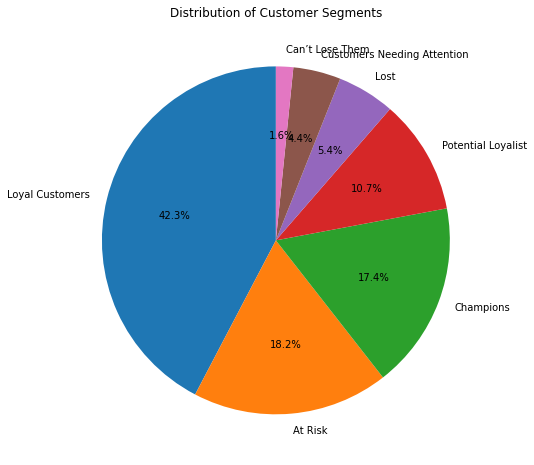

In [13]:
segment_counts = rfmSegmentation['Segment'].value_counts()

segment_counts.to_csv('C:/Users/DELL/Desktop/RBAC-2023/Data/segment_counts.csv')

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Customer Segments')
plt.show()

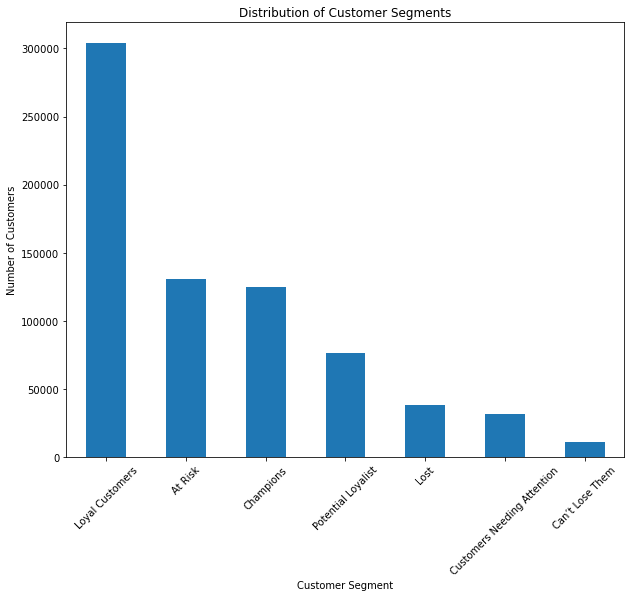

In [14]:
segment_counts = rfmSegmentation['Segment'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 8))
segment_counts.plot(kind='bar')
plt.title('Distribution of Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

In [15]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

first_order_date = df.groupby('CustomerID')['TransactionDate'].min()
last_order_date = df.groupby('CustomerID')['TransactionDate'].max()

customer_lifespan_days = (last_order_date - first_order_date).dt.days

average_sale_value_per_customer = df.groupby('CustomerID')['SalesAmount'].mean()

transactions_per_customer = df.groupby('CustomerID').size()

number_of_years = df['TransactionDate'].dt.year.nunique()
average_transactions_per_customer_per_year = transactions_per_customer / number_of_years

customer_value = average_sale_value_per_customer * average_transactions_per_customer_per_year

customer_lifetime_value = customer_value * (customer_lifespan_days / 365)

clv_df = pd.DataFrame({
    'CustomerID': customer_lifetime_value.index,
    'CustomerLifetimeValue': customer_lifetime_value.values
})

clv_df.to_csv('customer_lifetime_value.csv', index=False)

print(clv_df)

        CustomerID  CustomerLifetimeValue
0                0               0.000000
1                1               0.000000
2                8          425577.205479
3               14               0.000000
4               16               0.000000
...            ...                    ...
718045     2174066               0.000000
718046     2174072           71412.489498
718047     2174073               0.000000
718048     2174075               0.000000
718049     2174083               0.000000

[718050 rows x 2 columns]


# Churn Rate

In [16]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Month'] = df['TransactionDate'].dt.to_period('M')

monthly_active_customers = df.groupby('Month')['CustomerID'].nunique()

previous_month_active = monthly_active_customers.shift(1)

active_customers_set = df.groupby('Month')['CustomerID'].apply(set)

# --------------------------------------------------
first_transaction = df.groupby('CustomerID')['TransactionDate'].min().dt.to_period('M')

new_customers = first_transaction.groupby(first_transaction).size()
# --------------------------------------------------

churned_customers = active_customers_set.shift(1) - active_customers_set

churned_customers_count = churned_customers.apply(lambda x: len(x) if isinstance(x, set) else 0)

churn_rate = (churned_customers_count - new_customers) / previous_month_active

churn_rate.fillna(0, inplace=True)

print(churn_rate)
churn_rate.to_csv('C:/Users/DELL/Desktop/RBAC-2023/churn_rate.csv')

Month
2021-10    0.000000
2021-11    0.060734
2021-12   -0.034601
2022-01    0.124180
2022-02    0.203219
2022-03    0.212125
2022-04    0.323675
2022-05    0.210697
2022-06    0.263326
2022-07    0.314098
2022-08    0.355371
2022-09    0.412587
2022-10    0.345557
2022-11    0.442915
2022-12    0.313220
2023-01    0.235825
2023-02    0.520138
2023-03    0.324160
2023-04    0.418709
2023-05    0.385151
2023-06    0.391216
Freq: M, dtype: float64


# Monthly Churn Rate per Segmentations 

In [17]:
clv_rfm_merged = clv_df.merge(rfmSegmentation, on='CustomerID', how='right')

unique_customers_df = df.drop_duplicates(subset='CustomerID', keep='first')

full_merged_df = unique_customers_df.merge(clv_rfm_merged, on='CustomerID', how = 'right')

In [18]:
# Reduce the number of columns
del_cols = ['Unnamed: 0', 'BillID', 'VoucherStatus', 'Frequency', 'Recency', 'Monetary', 'R_Quartile', 'F_Quartile', 'M_Quartile', 'RFMClass', 'Month_x']

full_merged_df.drop(del_cols, axis=1, inplace=True)

In [19]:
full_merged_df

,Channel,OrderFrom,TransactionDate,SalesAmount,CustomerID,CustomerGender,Province,CustomerLifetimeValue,Segment,Month_y
0,Delivery,STORE,2021-12-24,411663.0,0,Unknown,Ho Chi Minh City,0.000000,At Risk,2021-12
1,Delivery,STORE,2022-03-07,105503.0,1,Unknown,Nothern Provinces,0.000000,Customers Needing Attention,2022-03
2,Delivery,CALL CENTER,2022-07-11,1098496.0,8,Unknown,Hanoi,425577.205479,Champions,2023-03
3,Delivery,WEBSITE,2023-05-27,267607.0,14,Unknown,Hanoi,0.000000,Loyal Customers,2023-05
4,Delivery,WEBSITE,2022-09-16,286558.0,16,Unknown,Nothern Provinces,0.000000,Loyal Customers,2022-09
...,...,...,...,...,...,...,...,...,...,...
718045,Take Away,STORE,2023-01-03,143685.0,2174066,Unknown,Nothern Provinces,0.000000,Potential Loyalist,2023-01
718046,Take Away,WEBSITE,2022-09-13,330512.0,2174072,Male,Southern Provinces,71412.489498,Champions,2022-12
718047,Delivery,STORE,2023-02-12,514503.0,2174073,Unknown,Ho Chi Minh City,0.000000,Loyal Customers,2023-02
718048,Delivery,STORE,2022-12-10,262489.0,2174075,Unknown,Southern Provinces,0.000000,Loyal Customers,2022-12


In [20]:
full_merged_df['TransactionDate'] = pd.to_datetime(full_merged_df['TransactionDate'])
full_merged_df['Month'] = full_merged_df['TransactionDate'].dt.to_period('M')

segment_monthly_counts = full_merged_df.groupby(['Month', 'Segment'])['CustomerID'].nunique()

monthly_counts = full_merged_df.groupby('Month')['CustomerID'].nunique()

segment_percentage = segment_monthly_counts.div(monthly_counts, level='Month') * 100

segment_percentage_df = segment_percentage.reset_index(name='Percentage')

print(segment_percentage_df)

segment_percentage_df.to_csv('C:/Users/DELL/Desktop/RBAC-2023/segment_percent_monthly.csv')

      Month             Segment  Percentage
0   2021-10             At Risk   48.156334
1   2021-10     Can’t Lose Them    7.468053
2   2021-10           Champions   26.037013
3   2021-10                Lost   12.484630
4   2021-10     Loyal Customers    5.853970
..      ...                 ...         ...
79  2023-05     Loyal Customers   65.335229
80  2023-05  Potential Loyalist   25.332477
81  2023-06           Champions    3.991890
82  2023-06     Loyal Customers   68.164001
83  2023-06  Potential Loyalist   27.844109

[84 rows x 3 columns]


# Customer Segments vs Gender, Province,...

CustomerGender                  Female       Male    Unknown
Segment                                                     
At Risk                       8.292672   8.573676  83.133653
Can’t Lose Them              15.160982  16.497440  68.341578
Champions                    14.966090  38.097831  46.936079
Customers Needing Attention   3.351920   5.591784  91.056296
Lost                         15.657956  28.458621  55.883423
Loyal Customers               6.936428  16.270889  76.792684
Potential Loyalist            2.331383   7.447364  90.221253


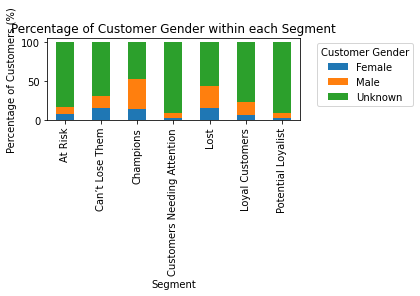

In [21]:
gender_counts = full_merged_df.groupby(['Segment', 'CustomerGender']).size().unstack(fill_value = 0)

total_gender_counts = gender_counts.sum(axis = 1)

gender_percentage = gender_counts.divide(total_gender_counts, axis = 0)*100

print(gender_percentage)
gender_percentage.to_csv('C:/Users/DELL/Desktop/RBAC-2023/gender_per_segments.csv')

gender_percentage.plot(kind='bar', stacked=True)

plt.title('Percentage of Customer Gender within each Segment')
plt.xlabel('Segment')
plt.ylabel('Percentage of Customers (%)')

plt.legend(title='Customer Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

OrderFrom                          APP  CALL CENTER      STORE    WEBSITE
Segment                                                                  
At Risk                       0.646004    17.009140  59.054361  23.290495
Can’t Lose Them               0.182244    23.066910  48.051723  28.699123
Champions                    11.310844    19.264307  44.822202  24.602647
Customers Needing Attention   2.835271     8.291592  77.856535  11.016602
Lost                          4.867785    24.058393  46.558263  24.515559
Loyal Customers               9.942608    12.875073  52.207165  24.975154
Potential Loyalist            4.972311     6.224858  75.590356  13.212476


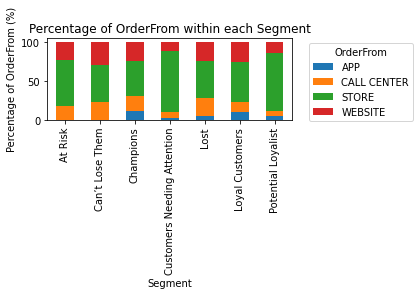

In [22]:
gender_counts = full_merged_df.groupby(['Segment', 'OrderFrom']).size().unstack(fill_value = 0)

total_gender_counts = gender_counts.sum(axis = 1)

gender_percentage = gender_counts.divide(total_gender_counts, axis = 0)*100

print(gender_percentage)
gender_percentage.to_csv('C:/Users/DELL/Desktop/RBAC-2023/orderfrom_per_segments.csv')

gender_percentage.plot(kind='bar', stacked=True)

plt.title('Percentage of OrderFrom within each Segment')
plt.xlabel('Segment')
plt.ylabel('Percentage of OrderFrom (%)')

plt.legend(title='OrderFrom', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Province                         Hanoi  Ho Chi Minh City  Nothern Provinces  \
Segment                                                                       
At Risk                      27.547553         27.677365          19.473270   
Can’t Lose Them              30.452139         30.018224          15.239087   
Champions                    32.040452         30.399795          13.318227   
Customers Needing Attention  24.931481         19.742935          25.507986   
Lost                         33.334199         30.778222          13.478622   
Loyal Customers              29.592858         29.433581          18.100265   
Potential Loyalist           24.256831         19.347213          26.902983   

Province                     Southern Provinces  
Segment                                          
At Risk                               25.301812  
Can’t Lose Them                       24.290549  
Champions                             24.241526  
Customers Needing Attention           

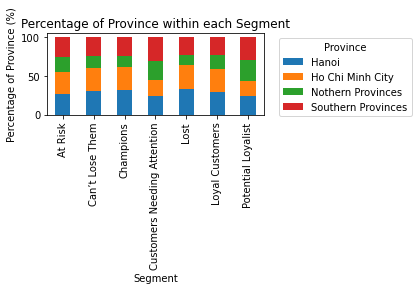

In [23]:
gender_counts = full_merged_df.groupby(['Segment', 'Province']).size().unstack(fill_value = 0)

total_gender_counts = gender_counts.sum(axis = 1)

gender_percentage = gender_counts.divide(total_gender_counts, axis = 0)*100

print(gender_percentage)
gender_percentage.to_csv('C:/Users/DELL/Desktop/RBAC-2023/province_per_segments.csv')

gender_percentage.plot(kind='bar', stacked=True)

plt.title('Percentage of Province within each Segment')
plt.xlabel('Segment')
plt.ylabel('Percentage of Province (%)')

plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Channel                       Delivery   Dine In  Take Away
Segment                                                    
At Risk                      39.271070  0.345910  60.383021
Can’t Lose Them              44.745292  0.477306  54.777402
Champions                    50.255827  2.663966  47.080207
Customers Needing Attention  21.982799  0.567054  77.450146
Lost                         52.805341  1.516962  45.677698
Loyal Customers              45.170367  2.711321  52.118312
Potential Loyalist           21.615903  0.940390  77.443707


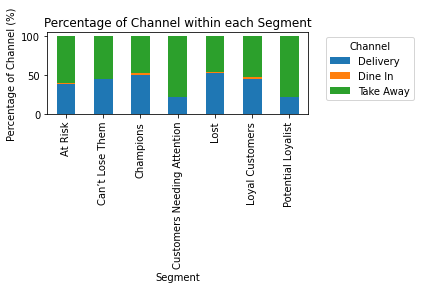

In [24]:
gender_counts = full_merged_df.groupby(['Segment', 'Channel']).size().unstack(fill_value = 0)

total_gender_counts = gender_counts.sum(axis = 1)

gender_percentage = gender_counts.divide(total_gender_counts, axis = 0)*100

gender_percentage.to_csv('C:/Users/DELL/Desktop/RBAC-2023/channel_per_segments.csv')
print(gender_percentage)

gender_percentage.plot(kind='bar', stacked=True)

plt.title('Percentage of Channel within each Segment')
plt.xlabel('Segment')
plt.ylabel('Percentage of Channel (%)')

plt.legend(title='Channel', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Customer Lifetime Value per Segments

In [25]:
clv_per_segment = full_merged_df.groupby('Segment')['CustomerLifetimeValue'].sum().reset_index()

In [26]:
clv_per_segment

,Segment,CustomerLifetimeValue
0,At Risk,2.010582e+07
1,Can’t Lose Them,3.468536e+08
2,Champions,7.475178e+10
3,Customers Needing Attention,0.000000e+00
4,Lost,8.378944e+09
5,Loyal Customers,2.315005e+09
6,Potential Loyalist,0.000000e+00


# Linear Regression to Predict the monthly Churn Rate in the next 6 months


[0.48862475 0.50784041 0.52705606 0.54627172 0.56548738 0.58470304]


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


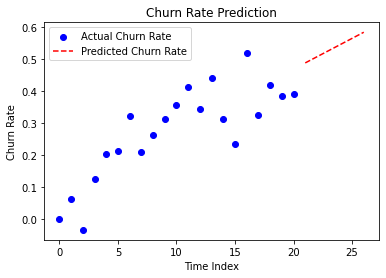

In [27]:
# ------------------------------------------Linear Regression----------------------------------------
churn_rate_df = churn_rate.reset_index(name='ChurnRate')

churn_rate_df['TimeIndex'] = np.arange(len(churn_rate_df))

X = churn_rate_df[['TimeIndex']]  
y = churn_rate_df['ChurnRate'].values 

model = LinearRegression()
model.fit(X, y)

future_periods = 6
future_index = np.arange(len(X), len(X) + future_periods).reshape(-1, 1)
future_churn_rate = model.predict(future_index)

print(future_churn_rate)

plt.scatter(churn_rate_df['TimeIndex'], churn_rate_df['ChurnRate'], color='blue', label='Actual Churn Rate')

plt.plot(np.arange(len(X), len(X) + future_periods), future_churn_rate, color='red', linestyle='--', label='Predicted Churn Rate')

plt.xlabel('Time Index')
plt.ylabel('Churn Rate')
plt.title('Churn Rate Prediction')
plt.legend()
plt.show()

In [28]:
X = sm.add_constant(churn_rate_df['TimeIndex'])

model = sm.OLS(y, X).fit()

summary = model.summary()

print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     37.68
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           6.70e-06
Time:                        19:05:01   Log-Likelihood:                 22.566
No. Observations:                  21   AIC:                            -41.13
Df Residuals:                      19   BIC:                            -39.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0851      0.037      2.325      0.0

In [29]:
p_value = model.pvalues[1] 
print('p-value for TimeIndex coefficient:', p_value)


p-value for TimeIndex coefficient: 6.6958987529336576e-06
